In [1]:
from itertools import combinations
import random
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from factor_analyzer import FactorAnalyzer

## import data

In [2]:
df = pd.read_csv('sample_data.csv')
display(df.head())
display(df.describe())

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
count,2784.000000,2773.00000,2774.000000,2781.000000,2784.000000,2779.000000,2776.000000,2780.000000,2774.000000,2784.000000,...,2764.000000,2771.000000,2778.000000,2800.000000,2772.000000,2786.000000,2780.000000,2800.000000,2577.000000,2800.000000
mean,2.413434,4.80238,4.603821,4.699748,4.560345,4.502339,4.369957,4.303957,2.553353,3.296695,...,3.185601,2.969686,4.816055,2.713214,4.438312,4.892319,2.489568,1.671786,3.190144,28.782143
std,1.407737,1.17202,1.301834,1.479633,1.258512,1.241347,1.318347,1.288552,1.375118,1.628542,...,1.569685,1.618647,1.129530,1.565152,1.220901,1.221250,1.327959,0.469647,1.107714,11.127555
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,...,2.000000,2.000000,4.000000,1.000000,4.000000,4.000000,1.000000,1.000000,3.000000,20.000000
50%,2.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,3.000000,...,3.000000,3.000000,5.000000,2.000000,5.000000,5.000000,2.000000,2.000000,3.000000,26.000000
75%,3.000000,6.00000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,...,4.000000,4.000000,6.000000,4.000000,5.000000,6.000000,3.000000,2.000000,4.000000,35.000000
max,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,5.000000,86.000000


最初の25列が質問文への回答（6段階評定）、残り3列は回答者の属性

## Preprocessing

In [3]:
df = df.iloc[:,0:25] # excluding sex,academic background and age
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2784 non-null   float64
 1   A2      2773 non-null   float64
 2   A3      2774 non-null   float64
 3   A4      2781 non-null   float64
 4   A5      2784 non-null   float64
 5   C1      2779 non-null   float64
 6   C2      2776 non-null   float64
 7   C3      2780 non-null   float64
 8   C4      2774 non-null   float64
 9   C5      2784 non-null   float64
 10  E1      2777 non-null   float64
 11  E2      2784 non-null   float64
 12  E3      2775 non-null   float64
 13  E4      2791 non-null   float64
 14  E5      2779 non-null   float64
 15  N1      2778 non-null   float64
 16  N2      2779 non-null   float64
 17  N3      2789 non-null   float64
 18  N4      2764 non-null   float64
 19  N5      2771 non-null   float64
 20  O1      2778 non-null   float64
 21  O2      2800 non-null   int64  
 22  

In [4]:
df.dropna(inplace=True) # deleting missing value
df = df.astype('int') 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      2436 non-null   int64
 1   A2      2436 non-null   int64
 2   A3      2436 non-null   int64
 3   A4      2436 non-null   int64
 4   A5      2436 non-null   int64
 5   C1      2436 non-null   int64
 6   C2      2436 non-null   int64
 7   C3      2436 non-null   int64
 8   C4      2436 non-null   int64
 9   C5      2436 non-null   int64
 10  E1      2436 non-null   int64
 11  E2      2436 non-null   int64
 12  E3      2436 non-null   int64
 13  E4      2436 non-null   int64
 14  E5      2436 non-null   int64
 15  N1      2436 non-null   int64
 16  N2      2436 non-null   int64
 17  N3      2436 non-null   int64
 18  N4      2436 non-null   int64
 19  N5      2436 non-null   int64
 20  O1      2436 non-null   int64
 21  O2      2436 non-null   int64
 22  O3      2436 non-null   int64
 23  O4      2436 non-n

## Factor Analysis

In [5]:
n_factors = 5

fa_promax = FactorAnalyzer(rotation='promax', n_factors=n_factors)
fa_promax.fit(df)

FactorAnalyzer(n_factors=5, rotation_kwargs={})

In [6]:
pd.DataFrame(fa_promax.loadings_, index=df.columns, columns=['factor_{}'.format(i) for i in range(n_factors)])

,factor_0,factor_1,factor_2,factor_3,factor_4
A1,0.148769,0.123084,0.064403,-0.462435,-0.058137
A2,0.045869,0.118225,0.065085,0.611390,-0.005235
A3,0.036942,0.236289,0.010280,0.620666,-0.014968
A4,-0.027023,0.120078,0.188161,0.410572,-0.174480
A5,-0.084524,0.331437,-0.030874,0.489399,0.006994
C1,0.072676,-0.029909,0.566752,-0.028424,0.159011
C2,0.161592,-0.089659,0.696710,0.040095,0.047828
C3,0.030105,-0.091776,0.597382,0.065960,-0.062746
C4,0.172850,0.069798,-0.652329,0.028847,-0.057116
C5,0.209140,-0.068558,-0.560836,0.025626,0.088733


In [7]:
result_df = pd.DataFrame(fa_promax.loadings_, index=df.columns, columns=['factor_{}'.format(i) for i in range(n_factors)])

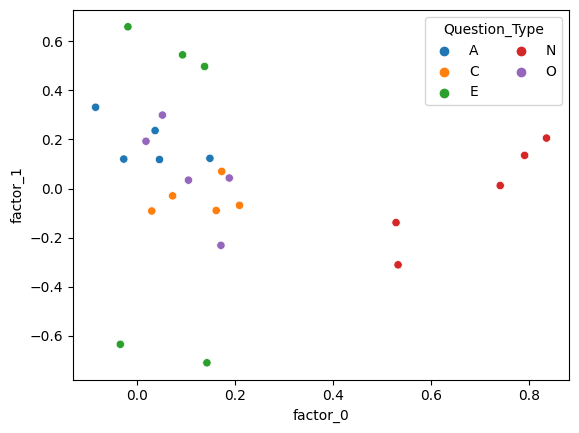

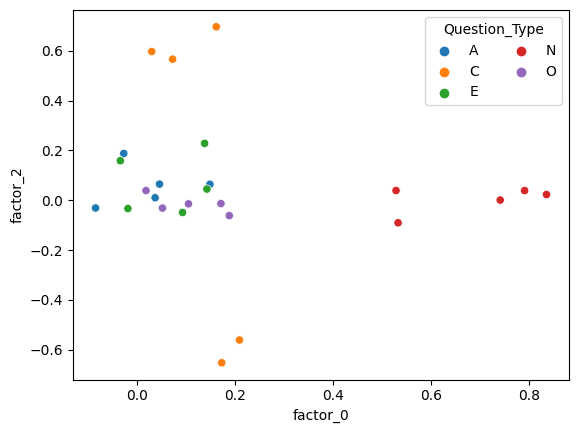

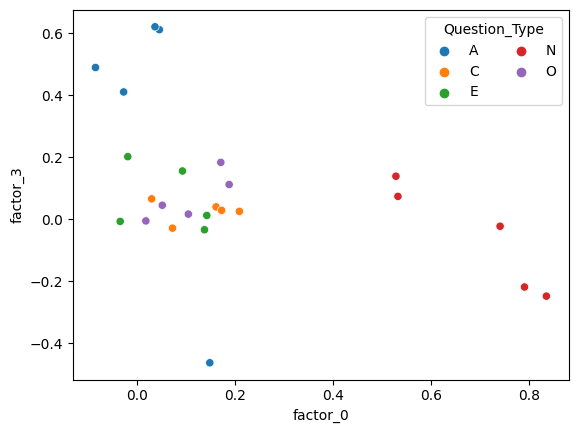

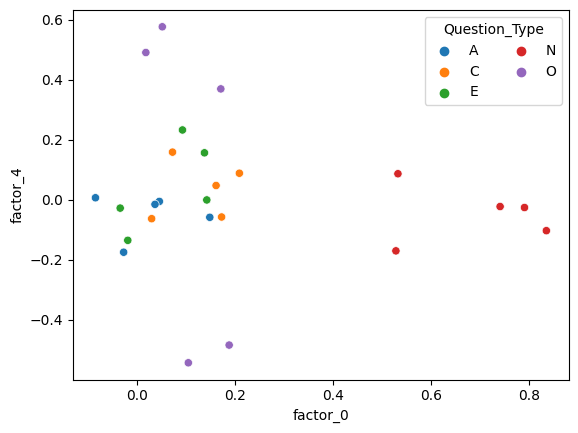

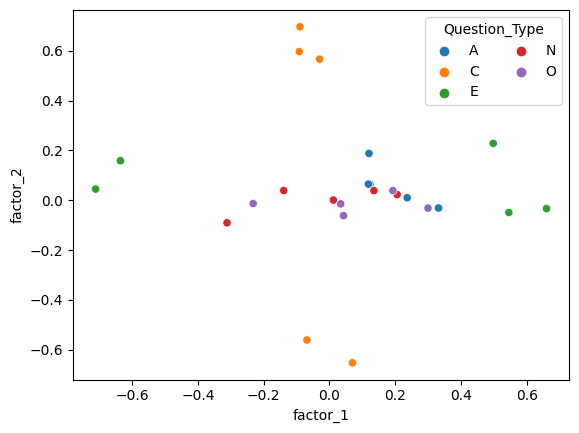

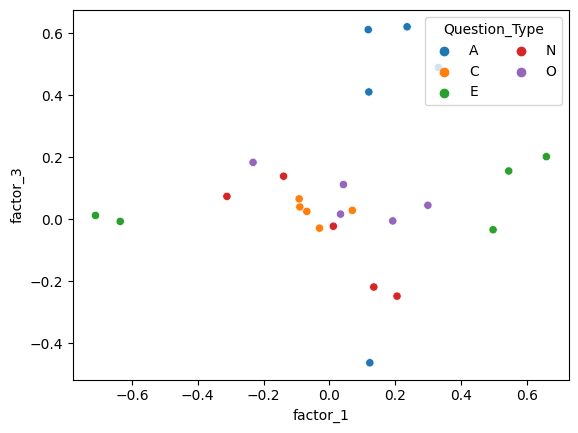

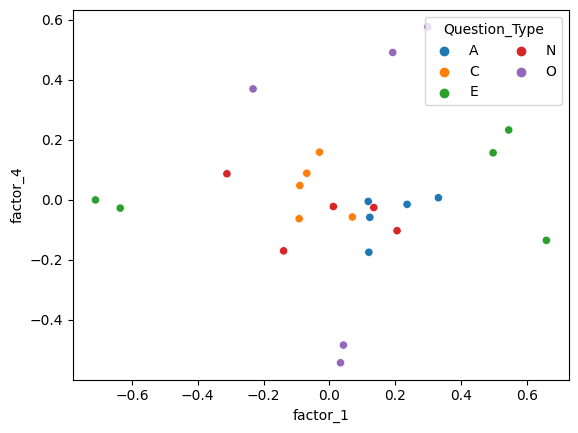

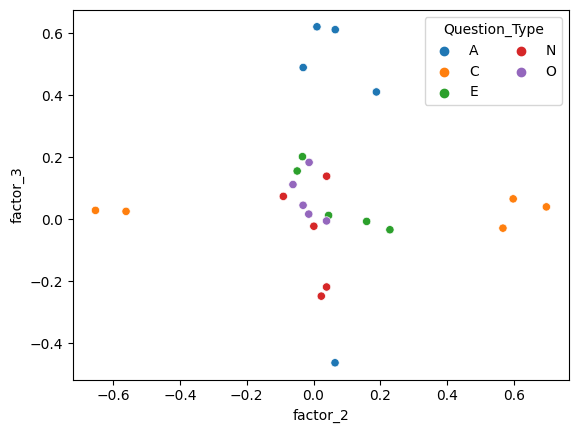

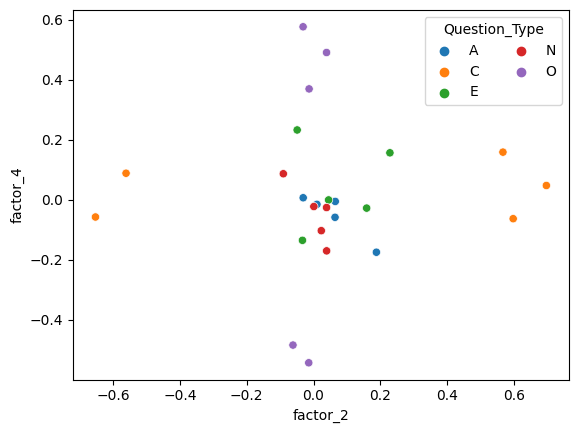

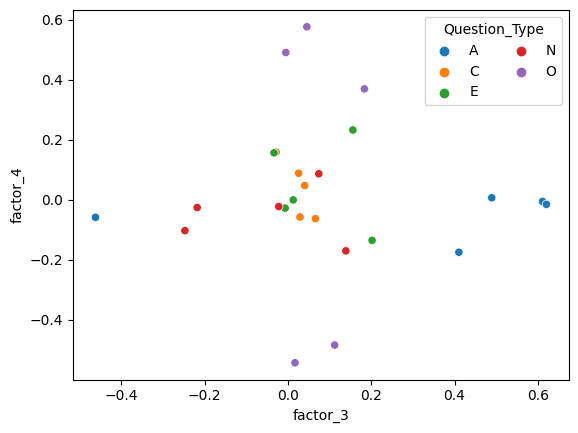

In [8]:
# adding new column from index as 'Question_Type'
result_df['Question_Type'] = [x[0] for x in result_df.index]


elements = result_df.drop('Question_Type', axis=1).columns
combinations_list = list(combinations(elements, 2))

for combo in combinations_list: 
    sns.scatterplot(x=combo[0], y=combo[1], hue='Question_Type', data=result_df)
    
    legend = plt.legend(loc='upper right', ncol=2)
    legend.set_title("Question_Type") # Title
    for label in legend.get_texts():
        label.set_fontsize(10)  # text size

    plt.show()

In [9]:
# rundom data
random_list = [[random.randint(1, 6) for _ in range(25)] for i in range(5)]
df_sample = pd.DataFrame(random_list, columns=df.columns)

factor_scores = fa_promax.transform(df_sample)  # compute factor scores
pd.DataFrame(factor_scores, columns=['factor_{}'.format(i) for i in range(n_factors)], index=df_sample.index)

,factor_0,factor_1,factor_2,factor_3,factor_4
0,0.748643,-1.456540,-0.969601,-0.053189,-2.363773
1,0.685637,-0.959746,-1.481643,-0.989667,-0.194133
2,0.203578,-0.579415,-1.887618,-1.812833,-2.249908
3,-0.146626,-0.509355,-0.846447,-0.030452,-1.311156
4,-0.072346,-1.227561,-0.391679,-1.055710,0.128171
